# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%aimport mc.util 
from mc.util import *
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os
import pyximport; pyximport.install()

plt.style.use('seaborn-v0_8-ticks')
matplotlib.rcParams["mathtext.fontset"] = "cm"

os.environ['CC'] = 'clang'
os.environ['CXX'] = 'clang -shared'

### CFT scaling collapse

In [3]:
# L, data, N = get_all_data("new-data/infinite-u/pt/*t0.82*.20*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=10000, by="l", with_counts=True)
L, data, N = get_all_data("new-data/t0j0/*r-3*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=10000, by="l", with_counts=True)

merged_data = {}
for l, d, n in zip(L, data, N):
    if l > 12:
        if l not in merged_data:
            # take horizontal cut
            merged_data[l] = (d[:, 0], n)
        else:
            prev_n = merged_data[l][1]
            merged_data[l] = ((merged_data[l][0] * prev_n + d[:, 0] * n) / (prev_n + n), prev_n + n)

L, data, N = get_all_data("new-data/t0j0/*r-6*/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=10000, by="l", with_counts=True)

merged_data2 = {}
for l, d, n in zip(L, data, N):
    if l > 12:
        if l not in merged_data2:
            # take horizontal cut
            merged_data2[l] = (d[:, 0], n)
        else:
            prev_n = merged_data2[l][1]
            merged_data2[l] = ((merged_data2[l][0] * prev_n + d[:, 0] * n) / (prev_n + n), prev_n + n)

L = L[L>12]

-0.2509529198884517 0.0008662588723200201
-0.2439170089597874 0.0007150214668653733
0.4724632116205809 0.003581141842416388


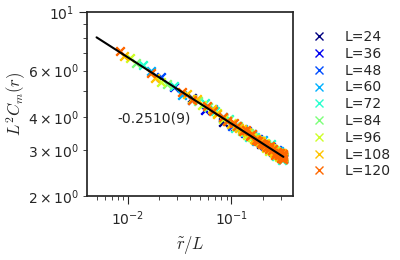

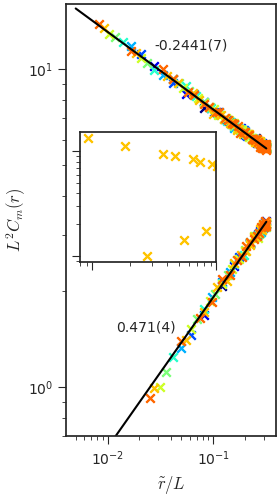

In [5]:
def plot(ax, merged_data, label=True, same_color=False, fit=True, filter_l=None, all_color=False):
    xs1 = []
    ys1 = []
    xs2 = []
    ys2 = []
    colors = gen_colors(L)

    for l, pair in merged_data.items():
        if filter_l != None and l != filter_l: continue

        d, total_n = pair
        x = np.arange(l)
        scaledx = np.sin(np.pi * x/l) / (np.pi/l)
        scaledx = scaledx/l

        d = d * l**2
        labelstr = str(l) if label else None

        if all_color:
            ax.scatter(scaledx, d, marker="x", color=colors[l], label=labelstr)
        elif same_color:
            ax.scatter(scaledx[x%3==0], d[x%3==0], marker="x", color=colors[l], label=labelstr)
        else:
            ax.scatter(scaledx[x%3!=0], d[x%3!=0], marker="x", color=colors[l], label=labelstr)

        for i in range(0, d.shape[0]//2):
            if i % 3 != 0:
                xs1.append(scaledx[i])
                ys1.append(d[i])
            else:
                xs2.append(scaledx[i])
                ys2.append(d[i])

    x = np.linspace(0.005, 1/np.pi, 100)

    # def fun(x, A, B, C):
    #     return B * np.exp(np.abs(x) / A) + C
    # param, _ = scipy.optimize.curve_fit(fun, xs[:20], ys[:20], p0=[-0.25, 1, 1/16], bounds=([-5, -np.inf, 0], [-0.01, np.inf, 100]))
    # plt.plot(x, fun(x, *param), label=f"Fit $y={param[1]:.2f}e^{{-x/{-param[0]:.2f}}}+{param[2]:.3f}$")

    if fit:
        def fun(x, A, B):
            return B * np.power(np.abs(x), A)

        if same_color:
            param, cov = scipy.optimize.curve_fit(fun, xs2, ys2, p0=[0.5, 1], bounds=([0, -np.inf], [1, np.inf]))
            ax.plot(x, fun(x, *param), color="k")
            print(param[0], np.sqrt(cov[0,0]))
        else:
            param, cov = scipy.optimize.curve_fit(fun, xs1, ys1, p0=[-0.25, 1], bounds=([-1, -np.inf], [0, np.inf]))
            ax.plot(x, fun(x, *param), color="k")
            print(param[0], np.sqrt(cov[0,0]))

plt.close("all")

# fig, ax = plt.subplots(3, 1, figsize=[3, 5.5], sharex=True)
# fig.subplots_adjust(hspace=0, left=0.26, right=0.98)
# plot(ax[0], merged_data)
# plot(ax[1], merged_data2)
# plot(ax[2], merged_data2, same_color=True)
# ax[0].text(0.032, 5.8, "-0.2510(9)")
# ax[1].text(0.032, 11.5, "-0.2441(7)")
# ax[2].text(0.007, 1.2, "0.471(4)")
# ax[0].set_ylabel("$L^2 C_{md}(r)$", labelpad=0, fontsize=12)
# ax[1].set_ylabel("$L^2 C_{md}(r)$", labelpad=0, fontsize=12)
# ax[2].set_ylabel("$L^2 C_{ms}(r)$", labelpad=0, fontsize=12)
# ax[2].set_xlabel("$\\tilde{r}/L$", fontsize=12)
# ax[0].text(0.95, 0.05, "3 vacancies\ndifferent color",
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform = ax[0].transAxes)
# ax[1].text(0.95, 0.05, "6 vacancies\ndifferent color",
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform = ax[1].transAxes)
# ax[2].text(0.95, 0.95, "6 vacancies\nsame color",
#         horizontalalignment='right',
#         verticalalignment='top',
#         transform = ax[2].transAxes)
# for a in ax:
#     a.set_xscale('log')
#     a.set_yscale('log')
#     a.set_ylim([0.5, 20])


# fig, ax = plt.subplots(1, 2, figsize=[7, 2.6], layout="constrained")
# plot(ax[0], merged_data)
# plot(ax[0], merged_data2)
# plot(ax[1], merged_data2, same_color=True)
# ax[0].text(0.006, 2.8, "3 vacancies\n-0.2510(9)")
# ax[0].text(0.032, 11.5, "6 vacancies\n-0.2441(7)")
# ax[1].text(0.007, 1.7, "6 vacancies\n0.471(4)")
# ax[0].set_ylabel("$L^2 C_{md}(r)$", labelpad=0, fontsize=12)
# ax[1].set_ylabel("$L^2 C_{ms}(r)$", labelpad=0, fontsize=12)
# ax[0].set_xlabel("$\\tilde{r}/L$", fontsize=12)
# ax[1].set_xlabel("$\\tilde{r}/L$", fontsize=12)
# ax[0].set_xscale("log")
# ax[0].set_yscale("log")
# ax[0].set_ylim([2, 20])
# ax[1].set_xscale("log")
# ax[1].set_yscale("log")
# ax[1].set_ylim([0.5, 5])

fig, ax = plt.subplots(1, 1, figsize=[4, 2.6], layout="constrained")
plot(ax, merged_data)
ax.text(0.008, 3.8, "-0.2510(9)")
ax.set_ylabel("$L^2 C_{m}(r)$", labelpad=0, fontsize=12)
ax.set_xlabel("$\\tilde{r}/L$", fontsize=12)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([2, 10])

colors = gen_colors(L)

custom_lines = [matplotlib.lines.Line2D([0], [0], color=colors[l], lw=2, marker="x", ls='none') for l in L]
custom_labels = ["L="+str(l) for l in L]
ax.legend(custom_lines, custom_labels, loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.2)
plt.savefig("figures/monomer-exp1.png", dpi=200)

fig, ax = plt.subplots(1, 1, figsize=[2.8, 5], layout="constrained")
plot(ax, merged_data2)
plot(ax, merged_data2, same_color=True)
ax.text(0.028, 11.5, "-0.2441(7)")
ax.text(0.012, 1.5, "0.471(4)")
ax.set_ylabel("$L^2 C_{m}(r)$", labelpad=0, fontsize=12)
ax.set_xlabel("$\\tilde{r}/L$", fontsize=12)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([0.7, 16])
plt.savefig("figures/monomer-exp2.png", dpi=200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
nax = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(0.1, 0.42, 0.65, 0.3), bbox_transform=ax.transAxes)
plot(nax, merged_data2, all_color=True, fit=False, filter_l=108)
nax.set_xscale("log")
nax.set_yscale("log")
nax.set_xticklabels([])
nax.set_yticklabels([])
nax.set_xlim([0.008, 0.1])

plt.savefig("figures/monomer-exp3.png", dpi=200)


# a2 = plt.axes((0, 0, 1, 1))
# a2.set_axis_off()
# a2.legend(custom_lines, custom_labels, loc='upper left', bbox_to_anchor=(0.28, 0.53), labelspacing=0.1, handletextpad=-0.3, borderpad=0.2, borderaxespad=0.2, frameon=True)


## Trimers

### Scaling

In [8]:
L, data, N = get_all_data("new-data/t0j0/*r-3*/tri-tri.dat", lambda data, props: data[0].reshape((props["l"], props["l"], 2)), skip=500000, by="l", with_counts=True)
# L, data, N = get_all_data("new-data/infinite-u/pt/*t0.8*/tri-tri.dat", lambda data, props: data[0].reshape((props["l"], props["l"], 2)), skip=100000, by="l", with_counts=True)
# L, data, N = get_all_data("new-data/t0j0-ergodic/*r-3*/tri-tri.dat", lambda data, props: data[0].reshape((props["l"], props["l"], 2)), skip=400000, by="l", with_counts=True)

merged_data = {}
for l, d, n in zip(L, data, N):
    if l > 12:
        if l not in merged_data:
            merged_data[l] = (d[:, :, :], n)
        else:
            prev_n = merged_data[l][1]
            merged_data[l] = ((merged_data[l][0] * prev_n + d[:, :, :] * n) / (n + prev_n), n + prev_n)
L = L[L>12]

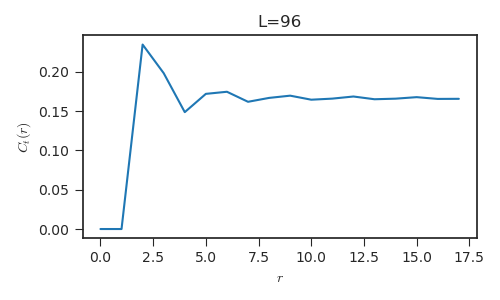

In [9]:
plt.figure(figsize=[5, 3])
plt.plot(merged_data[36][0][:18, 0, 0])
plt.xlabel("$r$")
plt.ylabel("$C_t(r)$")
plt.title("L=96")
plt.tight_layout()

0.16532011262730353
-2.1722511516373744 0.16532011262730353
0.1948011463658366
-2.0560347649745716 0.1948011463658366


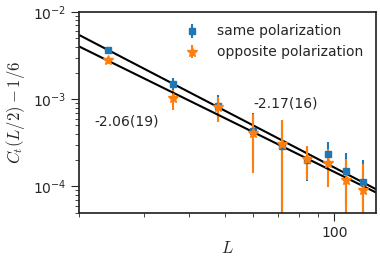

In [11]:
def fit(xs, ys, yerr):
    def fun(x, A, B):
        return B * np.power(np.abs(x), A)
    param, cov = scipy.optimize.curve_fit(fun, xs, ys, sigma=yerr, absolute_sigma=True, p0=[-2, 0.001])
    
    # jackknife = []
    # for i in range(len(xs)-5):
        # newxs = np.concatenate((xs[:i], xs[i+1:]))
        # newys = np.concatenate((ys[:i], ys[i+1:]))
        # newxs = xs[i:]
        # newys = ys[i:]
        # param, cov = scipy.optimize.curve_fit(fun, newxs, newys, p0=[-2, 0.001])
        # jackknife.append(param[0])
    # print(jackknife)
    # print(np.std(jackknife))

    print(np.sqrt(cov[0, 0]))
    return fun, param, np.sqrt(cov[0,0])

values = []
values2 = []
ns = []
ls = []
for l, pair in merged_data.items():
    d, n = pair
    ls.append(l)
    values.append(d[l//2, 0, 0])
    values2.append(d[l//2, 0, 1])
    ns.append(n)

ls = np.array(ls)
densities = (ls*ls/3-1)/(ls*ls*2)
# densities = (ls*ls/3-1)/(ls*ls*2)

values = np.array(values) - densities
values2 = -(np.array(values2) - densities)
ns = np.array(ns)

fig, ax = plt.subplots(1, 1, figsize=[3.8, 2.6], layout="constrained")
xs = np.linspace(20, 140, 30)

autocorr = 20
n_per_sample = 20
yerr = np.sqrt((values+densities)*(1-densities-values))/np.sqrt(ns*n_per_sample/autocorr)
plt.errorbar(ls, values, yerr=yerr, ls="", marker="s", ms=5, label="same polarization")
fun, param, err = fit(ls, values, yerr)
plt.plot(xs, fun(xs, *param), color="k") #, label=f"$y\\sim x^{{{param[0]:.3f}}}$")
print(param[0], err)
plt.text(60, 0.0008, "-2.17(16)")

yerr = np.sqrt((values2+densities)*(1-densities-values2))/np.sqrt(ns*n_per_sample/autocorr)
plt.errorbar(ls, values2, yerr=yerr, ls="", marker="*", ms=7, label="opposite polarization")
fun, param, err = fit(ls, values2, yerr)
plt.plot(xs, fun(xs, *param), color="k") #, label=f"$y\\sim x^{{{param[0]:.3f}}}$")
print(param[0], err)
plt.text(22, 0.0005, "-2.06(19)")

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel("$L$", fontsize=12, labelpad=0.03)
plt.xlim([20, 130])
plt.ylabel("$C_t(L/2)-1/6$", fontsize=12)
plt.ylim([0.00005, 0.01])
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.savefig("figures/trimer-exp.png", dpi=200)

## Restricted mobility and confinement

[-1.56987837  0.18024534  0.00173364]
0.0036194721437565144


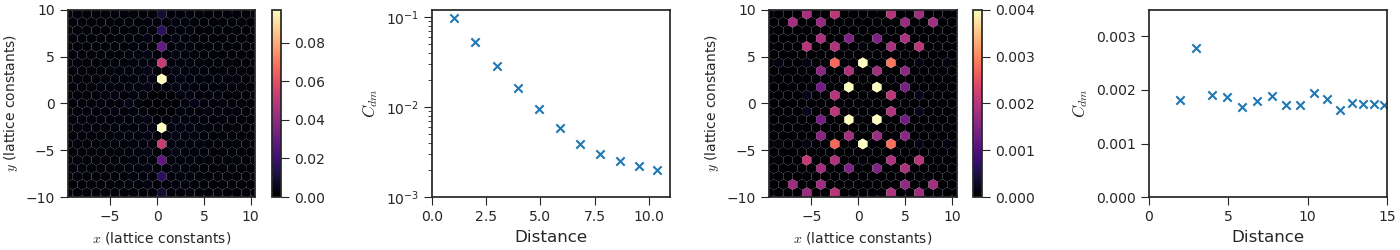

In [8]:
fig, ax = plt.subplots(1, 4, figsize=[14, 2.5], layout="constrained")
fig.get_layout_engine().set(wspace=0.1)

data1 = read_accumulator("new-data/finite-t/j-0.3t0.08/60x60_r-3_t0.080000_j-0.300_20000000.20_0/mono-di.dat")[0].reshape((60, 60), order='F')
plot2d(ax[2], data1, vmax=0.004)

data2 = read_accumulator("new-data/finite-t/j0.05t0.15/60x60_r-3_t0.150000_j0.050_20000000.20_0/mono-di.dat")[0].reshape((60, 60), order='F')
plot2d(ax[0], data2)

def mod(data, x, y):
    return data[x%(data.shape[0]), y%(data.shape[1])]

def symmetrize(data, cut):
    if cut == "perp":
        xs = np.arange(data.shape[0]//4)
        ys = np.zeros_like(xs, dtype=float)
        for i in xs:
            ys[i] = np.mean([mod(data, -i, 1+2*i), mod(data, 1+i, -1-2*i)][0])
    else:
        xs = np.arange(2*(data.shape[0]//6))
        ys = np.zeros_like(xs, dtype=float)
        for i in xs:
            ii = i // 2
            if i % 2 == 0:
                ys[i] = np.mean([mod(data, 0, 1+3*ii), mod(data, -3*ii, 1+3*ii),
                                 mod(data, 1+3*ii, -1-3*ii), mod(data, 1, -1-3*ii)])
            else:
                ys[i] = np.mean([mod(data, 1, 2+3*ii), mod(data, -2-3*ii, 2+3*ii),
                                 mod(data, 3+3*ii, -2-3*ii), mod(data, 0, -2-3*ii)])
    
    xs = np.sin(np.pi * xs/data.shape[0]) / (np.pi/data.shape[0]) 
    return xs[1:], ys[1:]

ax[2].set_xlim([-9.5, 10.5])
ax[2].set_ylim([-10, 10])
ax[0].set_xlim([-9.5, 10.5])
ax[0].set_ylim([-10, 10])
ax[2].axis("on")
ax[0].axis("on")

x = np.linspace(0, 12, 100)

xs, ys = symmetrize(data1, "zigzag")
ax[3].scatter(xs, ys, marker="x")
def fun(x, A):
    return np.ones_like(x) * A

param, _ = scipy.optimize.curve_fit(fun, xs[3:], ys[3:])
ax[3].set_xlabel("Distance", fontsize=12)
ax[3].set_ylabel("$C_{dm}$", fontsize=12)
ax[3].set_ylim([0, 0.0035])
ax[3].set_xlim([0, 15])

xs, ys = symmetrize(data2, "perp")
ax[1].scatter(xs, ys, marker="x")
def fun(x, A, B, C):
    return B * np.exp(np.abs(x) / A) + C
param, cov = scipy.optimize.curve_fit(fun, xs, ys, p0=[-1.5, 1, 0])
print(param)
print(np.sqrt(cov[0, 0]))
# ax[1].plot(x, fun(x, *param))
ax[1].set_yscale("log")
ax[1].set_xlabel("Distance", fontsize=12)
ax[1].set_ylabel("$C_{dm}$", fontsize=12)
ax[1].set_ylim([0.001, 0.12])
ax[1].set_xlim([0, 11])
ax[1].text(2.5, 0.05, "")

fig.savefig("figures/conf2.png", dpi=200)

Text(0.5, 1.0, 'dis J=0 T=0.10')

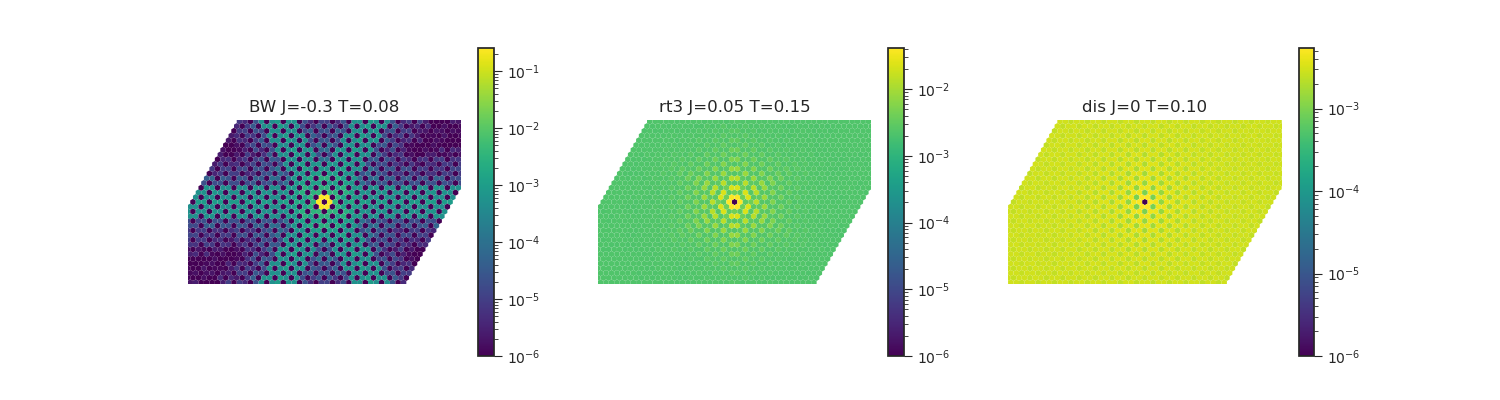

In [53]:
fig, ax = plt.subplots(1, 3, figsize=[15, 4])
data1 = read_accumulator("new-data/finite-t/j-0.3t0.08/48x48_r-3_t0.080000_j-0.300_20000000.20_0/mono-mono.dat")[0].reshape((48, 48), order='F')
plot2d(ax[0], data1, log=True)
ax[0].set_title("BW J=-0.3 T=0.08")

data1 = read_accumulator("new-data/finite-t/j0.05t0.15/48x48_r-3_t0.150000_j0.050_20000000.20_0/mono-mono.dat")[0].reshape((48, 48), order='F')
plot2d(ax[1], data1, log=True)
ax[1].set_title("rt3 J=0.05 T=0.15")

data1 = read_accumulator("new-data/finite-t/j0/48x48_r-3_t0.100000_j0.000_20000000.20_0/mono-mono.dat")[0].reshape((48, 48), order='F')
plot2d(ax[2], data1, log=True)
ax[2].set_title("dis J=0 T=0.10")

## CFT scaling hypothesis

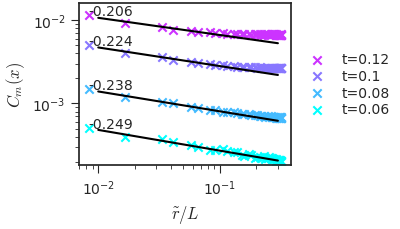

In [8]:
T, data = get_all_data("new-data/finite-t-ergodic/*/120*_0/mono-mono.dat", lambda data, props: data[0].reshape((props["l"], props["l"])), skip=100, by="t")

plt.figure(figsize=[4, 2.3], layout="constrained")
xs = []
ys = []
colors = gen_colors(T[(T<=0.12)*(T>=0.06)], "cool")
for t, d in zip(T, data):
    if t > 0.12: continue
    if t < 0.06: continue

    l = d.shape[0]
    x = np.arange(l)
    scaledx = np.sin(np.pi * x / l) / np.pi

    plt.scatter(scaledx[(x%3!=0)*(x<l//2)], d[(x%3!=0)*(x<l//2), 0], marker="x", label="T/U="+str(t), color=colors[t])

    xs = np.geomspace(0.01, 0.3, 100)
    def fun(x, A, B):
        return B * np.power(np.abs(x), A)
    param, _ = scipy.optimize.curve_fit(fun, scaledx[(x%3!=0)*(x<12)], d[(x%3!=0)*(x<12), 0])
    plt.plot(xs, fun(xs, *param), color="k")
    plt.text(scaledx[1], d[1, 0], f"{param[0]:.3f}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\\tilde{r}/L$", fontsize=12)
plt.ylabel("$C_m(x)$", fontsize=12)
plt.ylim([0.00018, 0.016])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.2, reverse=True)
plt.savefig("figures/ft.png", dpi=200)

## first order histograms

In [5]:
hist = read_histogram("new-data/vsweeps/binder-tri/0.35/48x48_r-0_t0.292422_j0.350_40000000.5_0/histogram.dat")

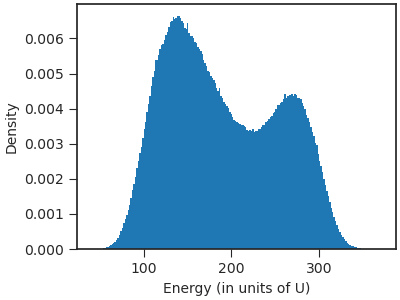

In [11]:
plt.figure(figsize=[4, 3], layout="constrained")
plt.hist(hist[0], bins=200, density=True);
plt.xlabel("Energy (in units of U)")
plt.ylabel("Density")
plt.savefig("figures/doublepeak.png")

In [53]:
hist = read_histogram("new-data/vsweeps/binder-tri/0.491/48x48_r-0_t0.319260_j0.491_40000000.5_0/histogram.dat")

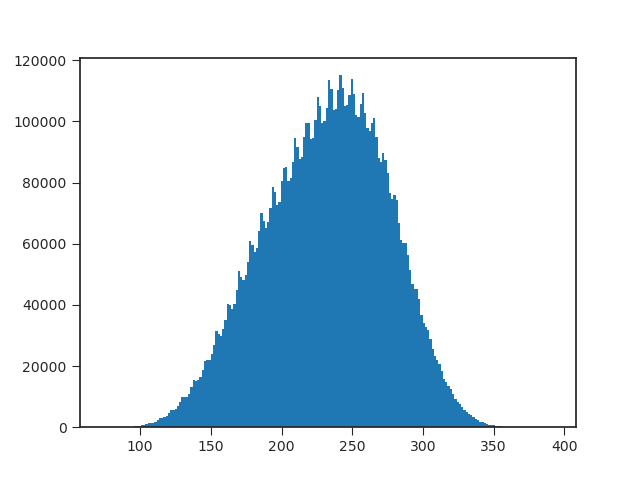

In [54]:
plt.figure()
plt.hist(hist[0], bins=200);

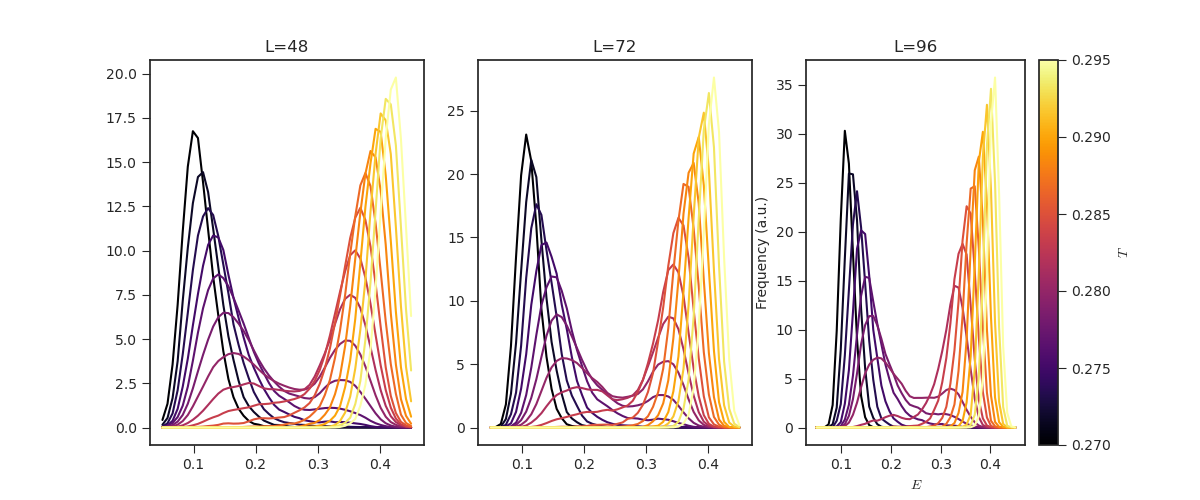

In [9]:
def show_hists(ax, files):
    import seaborn as sns
    for i, f in enumerate(sorted(enum_files(files), key=lambda f: f["t"])):
        e = np.genfromtxt(f["fname"], skip_header=0, max_rows=100000)
        l = f["l"]
        t = f["t"]
        j = f["j4"]
        kde = scipy.stats.gaussian_kde((e[:, 1]*j + e[:, 0])/l/l*3)
        xs = np.linspace(0.05, 0.45, 50)
        ax.plot(xs, kde(xs), color=matplotlib.colormaps["inferno"](i/15))

        # ax.hist((e[:, 1]*j + e[:, 0])/l/l*3, bins=50, histtype="step", density=True, lw=1, color=matplotlib.colormaps["inferno"](i/15))

fig, ax = plt.subplots(1, 3, figsize=[12, 5])

# show_hists(ax[0], "new-data/vsweeps/binder/0.4/84*/energy-single.dat")
# show_hists(ax[1], "new-data/vsweeps/binder/0.5b/84*/energy-single.dat")
# show_hists(ax[2], "new-data/vsweeps/binder/0.6b/84*/energy-single.dat")

# show_hists(ax[0], "new-data/ehist/0.1/48x48*/energy-single.dat")
# show_hists(ax[1], "new-data/ehist/0.1/72x72*/energy-single.dat")
# show_hists(ax[2], "new-data/ehist/0.1/96x96*/energy-single.dat")

# show_hists(ax[0], "new-data/ehist/0.3/48*/energy-single.dat")
# show_hists(ax[1], "new-data/ehist/0.3/72*/energy-single.dat")
# show_hists(ax[2], "new-data/ehist/0.3/96*/energy-single.dat")

# show_hists(ax[0], "new-data/ehist/0.3/48*t0.275000*/energy-single.dat")
# show_hists(ax[0], "new-data/ehist/0.3/48*t0.279933*/energy-single.dat")
# show_hists(ax[0], "new-data/ehist/0.3/48*t0.280424*/energy-single.dat")
# show_hists(ax[0], "new-data/ehist/0.3/48*t0.281543*/energy-single.dat")
# show_hists(ax[0], "new-data/ehist/0.3/48*t0.293000*/energy-single.dat")

# show_hists(ax[1], "new-data/ehist/0.3/72*t0.275000*/energy-single.dat")
# show_hists(ax[1], "new-data/ehist/0.3/72*t0.278998*/energy-single.dat")
# show_hists(ax[1], "new-data/ehist/0.3/72*t0.279445*/energy-single.dat")
# show_hists(ax[1], "new-data/ehist/0.3/72*t0.280096*/energy-single.dat")
# show_hists(ax[1], "new-data/ehist/0.3/72*t0.290000*/energy-single.dat")

# show_hists(ax[2], "new-data/ehist/0.3/96*t0.275000*/energy-single.dat")
# show_hists(ax[2], "new-data/ehist/0.3/96*t0.279541*/energy-single.dat")
# show_hists(ax[2], "new-data/ehist/0.3/96*t0.279939*/energy-single.dat")
# show_hists(ax[2], "new-data/ehist/0.3/96*t0.280510*/energy-single.dat")
# show_hists(ax[2], "new-data/ehist/0.3/96*t0.290000*/energy-single.dat")

# show_hists(ax[0], "new-data/ehist/1/48x48*/energy-single.dat")
# show_hists(ax[1], "new-data/ehist/1/72x72*/energy-single.dat")
# show_hists(ax[2], "new-data/ehist/1/96x96*/energy-single.dat")

ax[0].set_title("L=48")
ax[1].set_title("L=72")
ax[2].set_title("L=96")

ax[2].set_xlabel("$E$")
ax[2].set_ylabel("Frequency (a.u.)")
plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0.27, vmax=0.295), cmap="inferno"), ax=ax[2], label="$T$")

# Figures

[[0.5        0.48718159 0.47404349 ... 0.47404349 0.48718159 0.5       ]
 [0.51281841 0.5        0.48684438 ... 0.48684438 0.5        0.51281841]
 [0.52595651 0.51315562 0.5        ... 0.5        0.51315562 0.52595651]
 ...
 [0.52595651 0.51315562 0.5        ... 0.5        0.51315562 0.52595651]
 [0.51281841 0.5        0.48684438 ... 0.48684438 0.5        0.51281841]
 [0.5        0.48718159 0.47404349 ... 0.47404349 0.48718159 0.5       ]]
0.0001602050624799345
0.9998397949375201


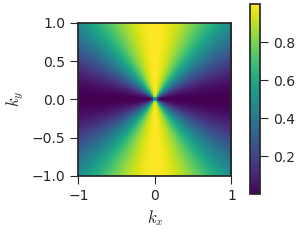

In [14]:
fig, ax = plt.subplots(1, 1, figsize=[3, 2.4], layout="constrained")
xs = np.linspace(-1, 1, 80)
ys = np.linspace(-1, 1, 80)
mapped = np.zeros((80, 80))
for xi, x in enumerate(xs):
    for yi, y in enumerate(ys):
        mapped[xi, yi] = 1 - x * x / (x**2+y**2)
print(mapped)
extent=(-1, 1, -1, 1)
cmap = "viridis"
print(np.amin(mapped))
print(np.amax(mapped))
norm = matplotlib.colors.Normalize(vmin=np.amin(mapped), vmax=np.amax(mapped))

ax.imshow(mapped.T, origin="lower", extent=extent, cmap=cmap, norm=norm)
ax.grid(False)
ax.set_xlabel("$k_x$", fontsize=12)
ax.set_ylabel("$k_y$", fontsize=12)

plt.colorbar(matplotlib.cm.ScalarMappable(norm, cmap=cmap), ax=ax)
plt.savefig("figures/pinch.png")

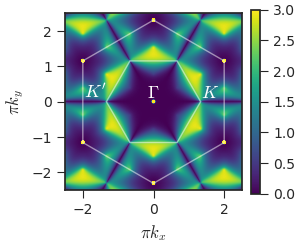

In [15]:
# data = read_accumulator("new-data/t0j0-ergodic/48x48_r-0_t0.000000_j0.000_50000000.10_0/tri-tri.dat")[0].reshape((48, 48, 2))
data = read_accumulator("new-data/t0j0-ergodic/120x120_r-0_t0.000000_j0.000_100000000.10_0/tri-tri.dat")[0].reshape((120, 120, 2))
data[0, 0, 0] = 1

fig, ax = plt.subplots(1, 1, figsize=[3, 2.5], layout="constrained")

plot_FT(ax, FT(data), proj="abs", vmax=3)

plt.savefig("figures/liquidsf.png", dpi=200)

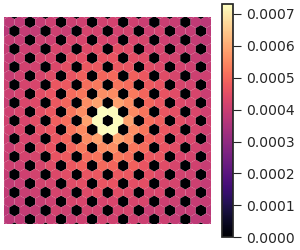

In [16]:
fig, ax = plt.subplots(1, 1, figsize=[3, 2.5], layout="constrained")

data1 = read_accumulator("new-data/t0j0/96x96_r-3_t0.000000_j0.000_200000000.10_0/mono-mono.dat", skip=10)[0].reshape((96, 96))
plot2d(ax, data1)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

plt.savefig("figures/monocorr.png", dpi=200)

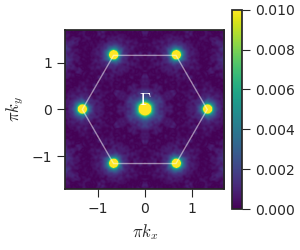

In [17]:
fig, ax = plt.subplots(1, 1, figsize=[3, 2.5], layout="constrained")

# data1 = read_accumulator("new-data/t0j0/96x96_r-3_t0.000000_j0.000_200000000.10_0/mono-mono.dat", skip=10)[0].reshape((96, 96))
# data1 = read_accumulator("new-data/t0j0-ergodic/120x120_r-3_t0.000000_j0.000_100000000.10_0/mono-mono.dat", skip=10)[0].reshape((120, 120))
data1 = read_accumulator("new-data/t0j0-ergodic/60x60_r-3_t0.000000_j0.000_50000000.10_0/mono-mono.dat", skip=10)[0].reshape((60, 60))
plot_FT(ax, FT(data1[:, :, None], coords=mono_coords), proj="abs", vmax=0.01, draw_extra=False)
ax.set_xlim([-1.7, 1.7])
ax.set_ylim([-1.7, 1.7])

plt.savefig("figures/monocorr.png", dpi=200)

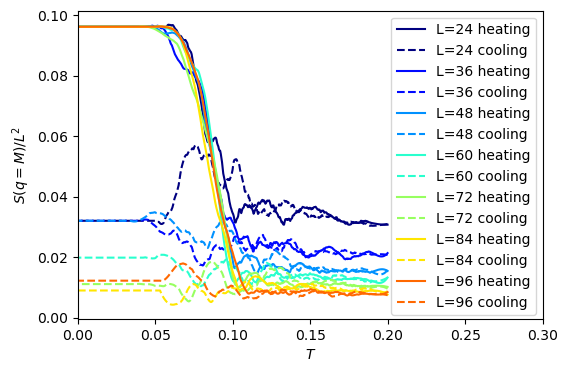

In [ ]:
ls = [24, 36, 48, 60, 72, 84, 96]
colors = gen_colors(ls)
plt.figure(figsize=[6, 4])
for l in ls:
    from scipy.signal import savgol_filter
    d = np.genfromtxt(f"new-data/heating/{l}x{l}_r-0_t0.000000_j-0.100_20000000.20_0/heating.dat", delimiter=";", max_rows=500000)
    smoothed = savgol_filter(bin(d[:, 1] / l**2, 1000), 51, 3)
    smoothedx = bin(d[:, 0], 1000)
    plt.plot(smoothedx, smoothed, color=colors[l], label="L="+str(l)+" heating")

    d = np.genfromtxt(f"new-data/cooling/{l}x{l}_r-0_t0.200000_j-0.100_20000000.20_0/heating.dat", delimiter=";", max_rows=500000)
    smoothed = savgol_filter(bin(d[:, 1] / l**2, 1000), 51, 3)
    smoothedx = bin(d[:, 0], 1000)
    if smoothedx[-1] > 0:
        smoothedx = np.concatenate((smoothedx, [0]))
        smoothed = np.concatenate((smoothed, [smoothed[-1]]))
    plt.plot(smoothedx, smoothed, color=colors[l], ls="--", label="L="+str(l)+" cooling")
plt.ylabel("$S(q=M)/L^2$")
plt.xlabel("$T$")
plt.xlim([0, 0.30])
plt.legend()
plt.savefig("figures/hist.png")